In [1]:
import numpy as np 
import pandas as pd 
import random as rnd 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
combine=[train_df,test_df]

In [9]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Data Visualization

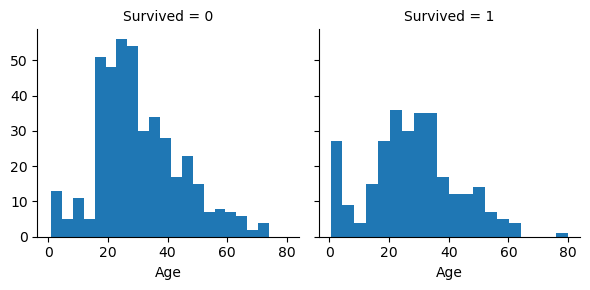

In [17]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

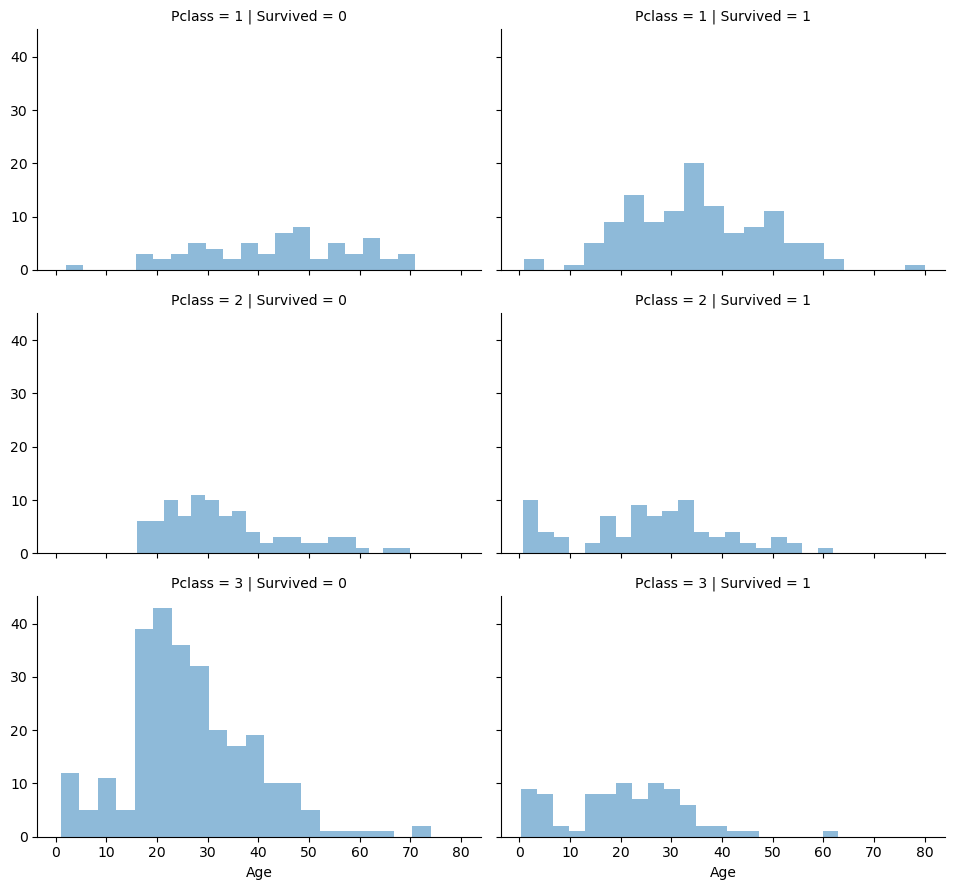

In [21]:
grid=sns.FacetGrid(train_df,col='Survived',row='Pclass',aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

C:\Users\tusha\anaconda\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\tusha\anaconda\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


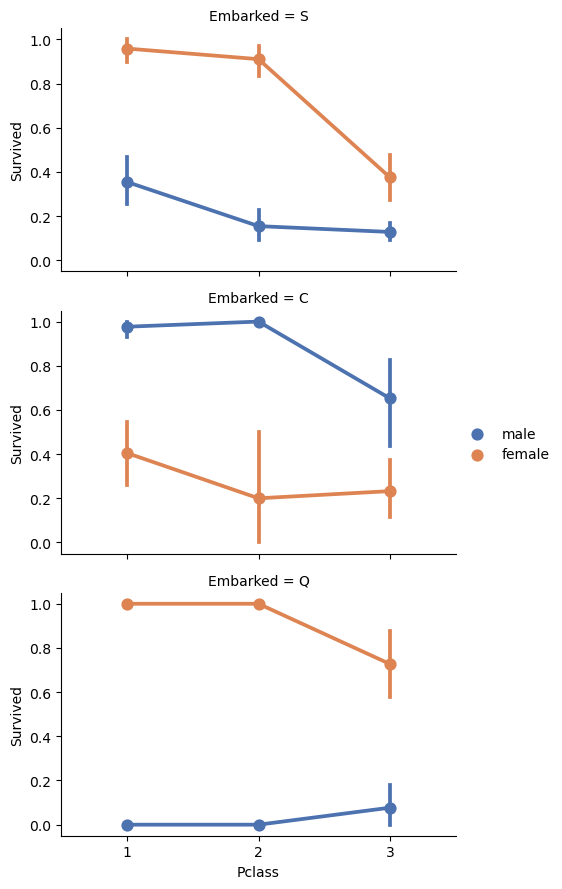

In [25]:
grid=sns.FacetGrid(train_df,row='Embarked',aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

C:\Users\tusha\anaconda\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\tusha\anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tusha\anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tusha\anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tusha\anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tusha\anaconda\l

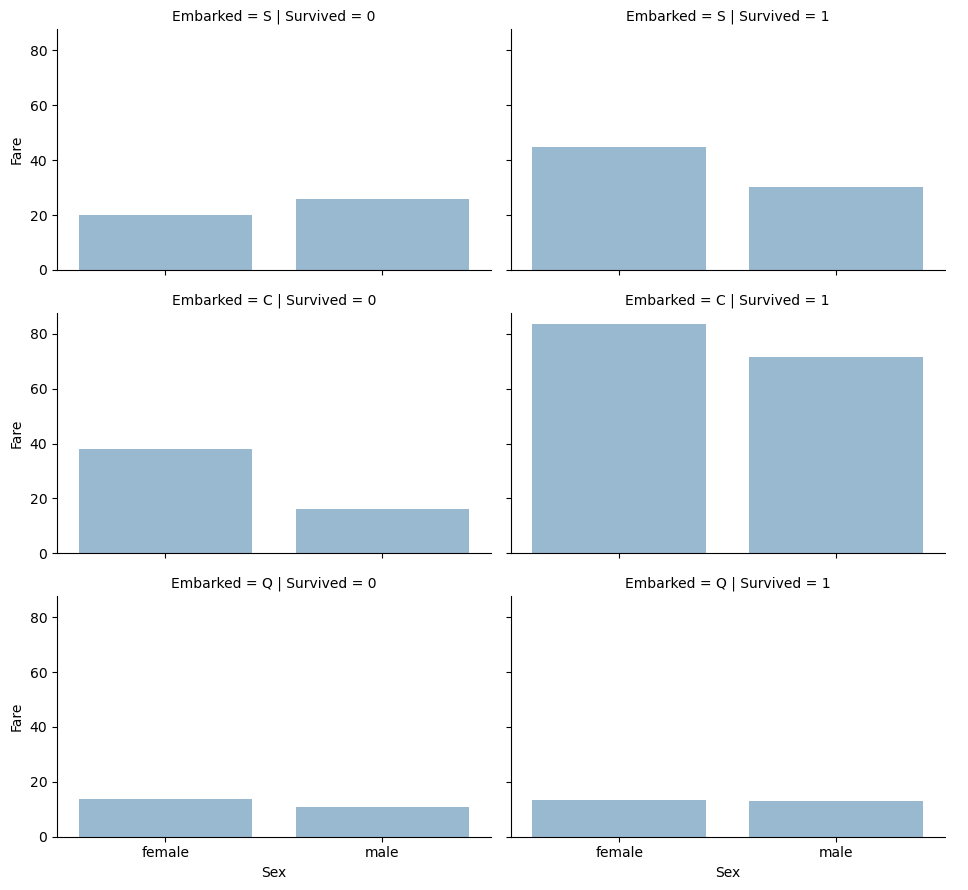

In [26]:
grid=sns.FacetGrid(train_df,row='Embarked',col='Survived', aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

In [33]:
print("Before",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)
combine=[train_df,test_df]

print("After",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)


Before (891, 10) (418, 9) (891, 10) (418, 9)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [34]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [36]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col',\
                                             'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [37]:
title_mapping={"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}

for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
    

In [38]:
train_df=train_df.drop(['Name','PassengerId'],axis=1)
test_df=test_df.drop(['Name'],axis=1)
combine=[train_df,test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

In [39]:
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'female':1,'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [40]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [41]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess=guess_df.median()
            guess_ages[i,j]=int(age_guess/0.5 + 0.5)*0.5
            
    for i in range (0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i) & (dataset.Pclass==j+1), 'Age']=guess_ages[i,j]
            
train_df.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [42]:
train_df['Ageband']=pd.cut(train_df['Age'],5)
train_df[['Ageband','Survived']].groupby(['Ageband'],as_index=False).mean().sort_values(by='Ageband',ascending=True)

,Ageband,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [44]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16, 'Age']=0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32),'Age']=1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48),'Age']=1
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64),'Age']=1
    dataset.loc[dataset['Age']>64,'Age']=1
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ageband
0,0,3,0,0.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,1.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,0.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,1.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,1.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [45]:
train_df=train_df.drop(['Ageband'],axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,0.0,1,0,7.2500,S,1
1,1,1,1,1.0,1,0,71.2833,C,3
2,1,3,1,0.0,0,0,7.9250,S,2
3,1,1,1,1.0,1,0,53.1000,S,3
4,0,3,0,1.0,0,0,8.0500,S,1


In [46]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
    
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [47]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
    
train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [48]:
train_df=train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df=test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine=[train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,0.0,7.2500,S,1,0
1,1,1,1,1.0,71.2833,C,3,0
2,1,3,1,0.0,7.9250,S,2,1
3,1,1,1,1.0,53.1000,S,3,0
4,0,3,0,1.0,8.0500,S,1,1


In [49]:
for dataset in combine:
    dataset['Age*Class']=dataset.Age*dataset.Pclass

train_df.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,0.0,0.0,3
1,1.0,1.0,1
2,0.0,0.0,3
3,1.0,1.0,1
4,3.0,1.0,3
5,0.0,0.0,3
6,1.0,1.0,1
7,0.0,0.0,3
8,0.0,0.0,3
9,0.0,0.0,2


In [50]:
freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [52]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [53]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,0.0,7.2500,0,1,0,0.0
1,1,1,1,1.0,71.2833,1,3,0,1.0
2,1,3,1,0.0,7.9250,0,2,1,0.0
3,1,1,1,1.0,53.1000,0,3,0,1.0
4,0,3,0,1.0,8.0500,0,1,1,3.0


In [56]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,1.0,7.8292,2,1,1,3.0
1,893,3,1,1.0,7.0000,0,3,0,3.0
2,894,2,0,1.0,9.6875,2,1,1,2.0
3,895,3,0,0.0,8.6625,0,1,1,0.0
4,896,3,1,0.0,12.2875,0,3,0,0.0


Prediction & Scores of Models

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [63]:
X_train=train_df.drop('Survived',axis=1)
Y_train=train_df['Survived']
X_test=test_df.drop('PassengerId',axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression

In [64]:
lg=LogisticRegression()
lg.fit(X_train,Y_train)
Y_pred=lg.predict(X_test)
acc_lg=round(lg.score(X_train,Y_train)*100,2)
acc_lg

C:\Users\tusha\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


79.01

In [65]:
coeff_df=pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns=['Feature']
coeff_df['Correlation']=pd.Series(lg.coef_[0])

coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.181544
5,Title,0.436807
4,Embarked,0.234642
6,IsAlone,0.162752
3,Fare,0.001438
2,Age,-0.238056
7,Age*Class,-0.273009
0,Pclass,-1.014837


Support Vector Classifier

In [68]:
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
acc_svc

67.68

Random Forest Classifier

In [71]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
acc_rf=round(rf.score(X_train,Y_train)*100,2)
acc_rf

93.04

K Nearest Neighbor

In [73]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

85.07

Gaussian Naive Bayes

In [76]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
acc_gnb=round(gnb.score(X_train,Y_train)*100,2)
acc_gnb

77.89

Stochastic Gradient Descent

In [85]:
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
acc_sgd=round(sgd.score(X_train,Y_train)*100,2)
acc_sgd

74.52

Decision Tree Classifier 

In [86]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)
acc_dt=round(dt.score(X_train,Y_train)*100,2)
acc_dt

93.04

XGBoost

In [88]:
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
Y_pred=xgb.predict(X_test)
acc_xgb=round(xgb.score(X_train,Y_train)*100,2)
acc_xgb

91.81

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [139]:
param_test1={'reg_alpha':[0.00001, 0.001, 0.01, 0.1, 1]}

param_test2={'learning_rate':[0.001,0.01,0.1,0.9]}

param_test3={'reg_lambda':[0.001,0.01,0.1,1,10,100]}

gsearch=GridSearchCV(estimator=XGBClassifier(learning_rate=0.01,
                                             n_estimators=1000,
                                             max_depth=8,
                                             min_child_weight=2,
                                             gamma=0.2,
                                             subsample=0.85,
                                             colsample_bytree=0.85,
                                             objective='binary:logistic',
                                             nthread=4,
                                             scale_pos_weight=1,
                                             seed=21),
                                             param_grid=param_test3,
                                             scoring='roc_auc',
                                             cv=2,
                                            )
gsearch.fit(X_train,Y_train)

print('Params:',gsearch.best_params_)
print('Score:',gsearch.best_score_)

Params: {'reg_lambda': 10}
Score: 0.8556461658459352


In [161]:
xgb_tuned=XGBClassifier(learning_rate=0.5,subsample=0.8,reg_lambda=0.1,objective='binary:logistic',seed=21)
xgb_tuned.fit(X_train,Y_train)
Y_pred=xgb_tuned.predict(X_test)
acc_xgb_tuned=round(xgb_tuned.score(X_train,Y_train)*100,2)
acc_xgb_tuned

93.04

Models and their accuracy

In [162]:
models=pd.DataFrame({'Model':['Support Vector Machine','KNN','Logistic Regression','Random Forest','Naive Bayes',\
                             'Stochastic Gradient Descent','Decision Tree','XGBoost Classifier','XGBoost Tuned'],
                    'Score': [acc_svc, acc_knn,acc_lg, acc_rf,acc_gnb,acc_sgd,acc_dt,acc_xgb,acc_xgb_tuned]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,93.04
6,Decision Tree,93.04
8,XGBoost Tuned,93.04
7,XGBoost Classifier,91.81
1,KNN,85.07
2,Logistic Regression,79.01
4,Naive Bayes,77.89
5,Stochastic Gradient Descent,74.52
0,Support Vector Machine,67.68


The best models are Random Forest, Decision Trees, XGBoost Classifier with Hyperparamater Tuning